In [29]:
import re
import pandas as pd
import numpy as np
import wordcloud as wc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
'''I'm not going to upload the generated file for security reasons. But it is good to note that the generated file
is in .txt format so Here I created functions that can help me get to some points in the entire text file
'''

# To get to the date point in the text, knowing fully well that that's the very first entry to every message in Whatsapp
def getDateTime(string):
    pat = ('^([0-9]+)(/)([0-9]+)(/)([0-9]+), ([0-9]+):([0-9]+) ([a-zA-Z]+) - ')
    res = re.match(pat, string)
    if res:
        return True
    return False


# After 
def getAuthor(string):
    a = ['([\w]+):',
         '([\w]+[\s]+[\w]+):',
         '([\w+]+[\s]+[\w]+[\s]+[\w]+):',
         '([+]\d{3} \d{3} \d{3} \d{4}):', # Nigerian number
         '([+]\d{1} [(]\d{3}[)] \d{3}[-]\d{4}):',   # US number
         '([+]\d{2} \d{3} \d{7}):',   # Austria numbers
         '([+]\d{2} \d{4} \d{6}):',   # UK numbers
         '([+]\d{2} \d{3} \d{4} \d{4}):', # China numbers
         '([+]\d{3} \d{2} \d{3} \d{4}):',    # UAE numbers, Namibia and DR Congo numbers
         '([+]\d{3} \d{2} \d{2} \d{2} \d{2}):' # Togo numbers
         '([+]\d{3} \d{2} \d{6}):',  # Sierra leone numbers
         '([+]\d{3} \d{3} \d{6}):',   # Kenya numbers
         '([+]\d{3} \d{2} \d{3} \d{3}):',  # Botswana numbers
         '([+]\d{2} \d{1} \d{2} \d{2} \d{2} \d{2}):', # France numbers
        '([\w]+)[\u263a-\U0001f999]+:',   # Emojis
        ]
    pat = '^' + '|'.join(a)
    res = re.match(pat, string)
    if res:
        return True
    return False


def getDataPoint(line):
    splitLine = line.split(' - ')
    dateTime = splitLine[0]
    Date, Time = dateTime.split(', ')
    Message = ' '.join(splitLine[1:])
    
    if getAuthor(Message):
        splitMessage = Message.split(': ')
        Author = splitMessage[0]
        Message = ' '.join(splitMessage[1:])
        
    else:
        Author = None
        
    return Date, Time, Author, Message

In [31]:
# Note tha the file is  a txt file, so it can't be read direct like a csv file

# df = pd.read_csv(r"C:\Users\Kachi B\Documents\python\Data Science\Whatsapp\WhatsApp Chat with OGANIHU UMUNNE 02\08 SET.txt")
# dfii


data = []
with open(r"C:\Users\Chisom\Documents\python\Data Science\Whatsapp\WhatsApp Chat with OGANIHU UMUNNE 02\08 SET.txt", encoding = 'utf-8') as file:
    file.readline()
    messages = []
    Date, Time, Author = None, None, None
    
    while True:
        line = file.readline()
        if not line:
            break
        line = line.strip()
        if getDateTime(line):
            if len(messages) > 0:
                data.append([Date, Time, Author, ' '.join(messages)])
            messages.clear()
            Date, Time, Author, Message = getDataPoint(line)
            messages.append(Message)
        else:
            messages.append(line)

In [32]:
# The Dataframe itself

df = pd.DataFrame(data, columns= ['Date', 'Time', 'Author', 'Message'])
df

,Date,Time,Author,Message
0,10/7/19,7:45 PM,+234 703 625 1261,<Media omitted>
1,10/7/19,8:09 PM,Fr Ijeoma Kenneth,These are old pictures
2,10/7/19,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo"
3,10/7/19,9:59 PM,Onye Nsọ,Only few have contributed.
4,10/7/19,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo
...,...,...,...,...
39992,12/29/22,10:31 PM,Okuma,Thank you my brother
39993,12/29/22,10:33 PM,Okuma,God bless you my brother at list to remember i...
39994,12/30/22,7:53 AM,Egbusunwa Magnus,<Media omitted>
39995,12/30/22,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...


In [33]:
df.isna().sum()

Date         0
Time         0
Author     560
Message      0
dtype: int64

In [34]:
group_notifications = df[df.Author.isna()]
group_notifications

,Date,Time,Author,Message
38,10/15/19,10:53 AM,None,+234 816 805 6506 left
41,10/24/19,8:22 AM,None,Onye Nsọ changed this group's icon
42,10/24/19,9:04 AM,None,"Omechuruagu changed the subject from ""O2/08 BO..."
121,10/28/19,11:13 AM,None,"Omechuruagu changed the subject from ""Happy bi..."
124,10/28/19,2:16 PM,None,Onye Nsọ changed this group's icon
...,...,...,...,...
39175,12/6/22,7:30 AM,None,Egbusunwa Magnus changed this group's icon
39222,12/8/22,10:53 AM,None,Onyenuforo Sydney changed this group's icon
39382,12/12/22,9:56 PM,None,Onyenuforo Sydney changed this group's icon
39761,12/20/22,11:25 PM,None,AHANOTU UDOKA changed this group's icon


In [35]:
df = df.dropna().reset_index(drop = True)
df

,Date,Time,Author,Message
0,10/7/19,7:45 PM,+234 703 625 1261,<Media omitted>
1,10/7/19,8:09 PM,Fr Ijeoma Kenneth,These are old pictures
2,10/7/19,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo"
3,10/7/19,9:59 PM,Onye Nsọ,Only few have contributed.
4,10/7/19,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo
...,...,...,...,...
39432,12/29/22,10:31 PM,Okuma,Thank you my brother
39433,12/29/22,10:33 PM,Okuma,God bless you my brother at list to remember i...
39434,12/30/22,7:53 AM,Egbusunwa Magnus,<Media omitted>
39435,12/30/22,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...


In [36]:
# For the sake of Privacy, I'm going to remove the tell end of the phone numbers, like this

for i in df.Author.unique():
    if '+' in i:
        print(i[:12])

+234 703 625
+234 806 523
+234 703 123
+234 806 571
+44 7767 596
+234 816 504
+234 806 842
+234 706 538
+234 806 626
+234 803 977
+1 (862) 414
+234 816 888
+1 (301) 674
+234 806 655
+234 703 366
+1 (470) 775
+234 703 129
+234 813 330
+234 803 353
+234 803 250
+234 803 040
+234 803 744
+234 816 921
+971 56 170 
+234 802 322
+1 (862) 367
+234 803 753
+234 703 485
+234 703 088
+234 803 943
+234 809 871
+234 810 319
+234 703 288
+234 806 877
+234 806 071
+234 810 030
+234 813 718
+234 813 344
+44 7384 593
+234 803 857
+43 688 9078
+234 813 940
+234 703 021
+234 816 569
+234 806 977
+234 703 252
+234 810 859
+234 810 385
+234 816 805
+234 811 106
+234 706 326
+234 708 337
+234 803 065
+971 58 692 
+234 808 327
+234 816 643
+44 7765 622
+234 813 042
+234 806 870
+234 912 917
+86 132 4683
+1 (914) 732
+234 706 213
+971 58 620 
+268 7929 13
+234 904 521
+234 913 392
+234 803 463
+234 808 470


In [37]:
# Let's implement that directly into our dataframe

for i in df.Author.unique():
    if '+' in i:        
        df.Author.replace(i, i[:12], inplace= True)

In [38]:
# Let's check to make sure our number of Authors are still complete and not altered

df.Author.nunique()

107

In [39]:
df

,Date,Time,Author,Message
0,10/7/19,7:45 PM,+234 703 625,<Media omitted>
1,10/7/19,8:09 PM,Fr Ijeoma Kenneth,These are old pictures
2,10/7/19,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo"
3,10/7/19,9:59 PM,Onye Nsọ,Only few have contributed.
4,10/7/19,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo
...,...,...,...,...
39432,12/29/22,10:31 PM,Okuma,Thank you my brother
39433,12/29/22,10:33 PM,Okuma,God bless you my brother at list to remember i...
39434,12/30/22,7:53 AM,Egbusunwa Magnus,<Media omitted>
39435,12/30/22,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...


In [40]:
# Okay we are good as the numbers I saved are good and the ones i do not save are protected

df.Author.unique()

array(['+234 703 625', 'Fr Ijeoma Kenneth', 'Onye Nsọ', '+234 806 523',
       '+234 703 123', '+234 806 571', '+44 7767 596', 'Amaraegbu Mayor',
       '+234 816 504', 'Onyenuforo Sydney', 'Omechuruagu',
       'Bonaventure Nneji', '+234 806 842', '+234 706 538', 'Nwadikwa',
       'Onyemesim Chidube', '+234 806 626', 'Anugom Ifeanyi',
       'AHANOTU UDOKA', '+234 803 977', '+1 (862) 414', '+234 816 888',
       'Amechi Chiadika', '+1 (301) 674', 'ADAM 1', 'Uzoma Kizito',
       'Chisom Ohachu', 'Umeaku', 'Dimgba Henry', 'Secundum',
       '+234 806 655', 'Umeonyirioha Emmanuel', 'Egbusunwa Magnus',
       '+234 703 366', '+1 (470) 775', 'Bomber', '+234 703 129', 'Amo',
       'Umeozuruoha Chinedu', '+234 813 330', '+234 803 353',
       '+234 803 250', 'Nwizugbo Chidi', 'Okoro Igne', 'Mazi Mbe',
       '+234 803 040', 'Ekeocha Kingdaga', '+234 803 744', '+234 816 921',
       '+971 56 170 ', '+234 802 322', '+1 (862) 367', '+234 803 753',
       'Ogbuji Justin', '+234 703 485', '+23

In [41]:
# In continuation, let's make our dataframe recognize our date column as Date

df.Date = pd.to_datetime(df.Date)
df

,Date,Time,Author,Message
0,2019-10-07,7:45 PM,+234 703 625,<Media omitted>
1,2019-10-07,8:09 PM,Fr Ijeoma Kenneth,These are old pictures
2,2019-10-07,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo"
3,2019-10-07,9:59 PM,Onye Nsọ,Only few have contributed.
4,2019-10-07,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo
...,...,...,...,...
39432,2022-12-29,10:31 PM,Okuma,Thank you my brother
39433,2022-12-29,10:33 PM,Okuma,God bless you my brother at list to remember i...
39434,2022-12-30,7:53 AM,Egbusunwa Magnus,<Media omitted>
39435,2022-12-30,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...


In [42]:
# Now let's get out the differnt parts of date from our date column, the months, days and time


df['Mon/Year'] = df.Date.dt.strftime('%b-%Y')
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month_name()
df['Day'] = df.Date.dt.day_name()
df = df[['Date', 'Year', 'Mon/Year','Month', 'Day','Time', 'Author', 'Message']] # Rearranging the dataframe in my choice of manner
df

,Date,Year,Mon/Year,Month,Day,Time,Author,Message
0,2019-10-07,2019,Oct-2019,October,Monday,7:45 PM,+234 703 625,<Media omitted>
1,2019-10-07,2019,Oct-2019,October,Monday,8:09 PM,Fr Ijeoma Kenneth,These are old pictures
2,2019-10-07,2019,Oct-2019,October,Monday,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo"
3,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Only few have contributed.
4,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo
...,...,...,...,...,...,...,...,...
39432,2022-12-29,2022,Dec-2022,December,Thursday,10:31 PM,Okuma,Thank you my brother
39433,2022-12-29,2022,Dec-2022,December,Thursday,10:33 PM,Okuma,God bless you my brother at list to remember i...
39434,2022-12-30,2022,Dec-2022,December,Friday,7:53 AM,Egbusunwa Magnus,<Media omitted>
39435,2022-12-30,2022,Dec-2022,December,Friday,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...


In [43]:
total_msg = df.Message.count()
total_msg

39437

In [44]:
# Trying to see how much of media contents are posted in our group

media = df[df.Message == '<Media omitted>']
media

,Date,Year,Mon/Year,Month,Day,Time,Author,Message
0,2019-10-07,2019,Oct-2019,October,Monday,7:45 PM,+234 703 625,<Media omitted>
8,2019-10-09,2019,Oct-2019,October,Wednesday,11:28 PM,+44 7767 596,<Media omitted>
30,2019-10-12,2019,Oct-2019,October,Saturday,6:34 PM,Nwadikwa,<Media omitted>
37,2019-10-14,2019,Oct-2019,October,Monday,10:40 PM,+234 706 538,<Media omitted>
40,2019-10-24,2019,Oct-2019,October,Thursday,8:21 AM,Onye Nsọ,<Media omitted>
...,...,...,...,...,...,...,...,...
39425,2022-12-29,2022,Dec-2022,December,Thursday,10:55 AM,+234 803 943,<Media omitted>
39426,2022-12-29,2022,Dec-2022,December,Thursday,10:56 AM,Umeaku,<Media omitted>
39429,2022-12-29,2022,Dec-2022,December,Thursday,12:43 PM,Okuma,<Media omitted>
39430,2022-12-29,2022,Dec-2022,December,Thursday,2:58 PM,+1 (862) 414,<Media omitted>


In [45]:
med = media.shape[0]
med

9699

In [46]:
msg = total_msg - med
msg

29738

In [47]:
# I want to get the number letters used by each user on each message sent

letter = []

for i in df.Message:
    if i == '<Media omitted>':
        letter.append(0)
        
    else:
        # in order to get the actual number of letters, we have to remove the white spaces between the words
        
        s = i.split(' ') # First, seperate trhe words by the spaces
        d = ''.join(s) # Join the sperated words together
        letter.append(len(d)) # Append the length of the joined words
        
df['No. of Letters'] = letter
df

C:\Users\Chisom\AppData\Local\Temp\ipykernel_9668\715699175.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No. of Letters'] = letter


,Date,Year,Mon/Year,Month,Day,Time,Author,Message,No. of Letters
0,2019-10-07,2019,Oct-2019,October,Monday,7:45 PM,+234 703 625,<Media omitted>,0
1,2019-10-07,2019,Oct-2019,October,Monday,8:09 PM,Fr Ijeoma Kenneth,These are old pictures,19
2,2019-10-07,2019,Oct-2019,October,Monday,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo",40
3,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Only few have contributed.,23
4,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo,24
...,...,...,...,...,...,...,...,...,...
39432,2022-12-29,2022,Dec-2022,December,Thursday,10:31 PM,Okuma,Thank you my brother,17
39433,2022-12-29,2022,Dec-2022,December,Thursday,10:33 PM,Okuma,God bless you my brother at list to remember i...,69
39434,2022-12-30,2022,Dec-2022,December,Friday,7:53 AM,Egbusunwa Magnus,<Media omitted>,0
39435,2022-12-30,2022,Dec-2022,December,Friday,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...,452


In [48]:
# I wish to get the number of words on each message a user posted

words = []

for i in df.Message:
    if i == '<Media omitted>':
        words.append(0)
        
    else:
        words.append(len(i.split(' ')))
        
df['No. of Words'] = words
df

C:\Users\Chisom\AppData\Local\Temp\ipykernel_9668\2517070022.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No. of Words'] = words


,Date,Year,Mon/Year,Month,Day,Time,Author,Message,No. of Letters,No. of Words
0,2019-10-07,2019,Oct-2019,October,Monday,7:45 PM,+234 703 625,<Media omitted>,0,0
1,2019-10-07,2019,Oct-2019,October,Monday,8:09 PM,Fr Ijeoma Kenneth,These are old pictures,19,4
2,2019-10-07,2019,Oct-2019,October,Monday,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo",40,7
3,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Only few have contributed.,23,4
4,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo,24,4
...,...,...,...,...,...,...,...,...,...,...
39432,2022-12-29,2022,Dec-2022,December,Thursday,10:31 PM,Okuma,Thank you my brother,17,4
39433,2022-12-29,2022,Dec-2022,December,Thursday,10:33 PM,Okuma,God bless you my brother at list to remember i...,69,18
39434,2022-12-30,2022,Dec-2022,December,Friday,7:53 AM,Egbusunwa Magnus,<Media omitted>,0,0
39435,2022-12-30,2022,Dec-2022,December,Friday,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...,452,107


In [50]:
# In a bid to get the number of media content a user posted;

media = []

for i in df.Message:
    if i == '<Media omitted>':
        media.append(1)
        
    else:
        media.append(0)
        
df['Media'] = media
df

C:\Users\Chisom\AppData\Local\Temp\ipykernel_9668\2328646412.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Media'] = media


,Date,Year,Mon/Year,Month,Day,Time,Author,Message,No. of Letters,No. of Words,Media
0,2019-10-07,2019,Oct-2019,October,Monday,7:45 PM,+234 703 625,<Media omitted>,0,0,1
1,2019-10-07,2019,Oct-2019,October,Monday,8:09 PM,Fr Ijeoma Kenneth,These are old pictures,19,4,0
2,2019-10-07,2019,Oct-2019,October,Monday,9:58 PM,Onye Nsọ,"Umunaa, our contributions are still ongoing oo",40,7,0
3,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Only few have contributed.,23,4,0
4,2019-10-07,2019,Oct-2019,October,Monday,9:59 PM,Onye Nsọ,Onurube nwanne agbalaoso oo,24,4,0
...,...,...,...,...,...,...,...,...,...,...,...
39432,2022-12-29,2022,Dec-2022,December,Thursday,10:31 PM,Okuma,Thank you my brother,17,4,0
39433,2022-12-29,2022,Dec-2022,December,Thursday,10:33 PM,Okuma,God bless you my brother at list to remember i...,69,18,0
39434,2022-12-30,2022,Dec-2022,December,Friday,7:53 AM,Egbusunwa Magnus,<Media omitted>,0,0,1
39435,2022-12-30,2022,Dec-2022,December,Friday,3:24 PM,Bomber,Anybody interested in a free ride on a helicop...,452,107,0


In [51]:
# url = r'(https//S+)'

# df['Media'] = re.findall(url, [i for i in df.Message]).count
# df

In [52]:
# General group Analysis

print('General Group Analysis')
print(f'Total Number of Messages: {total_msg}')
print(f'Total Number of Text Messages: {msg}')
print(f'Total Number of Media Messages: {med}')

General Group Analysis
Total Number of Messages: 39437
Total Number of Text Messages: 29738
Total Number of Media Messages: 9699


In [72]:
# Each Member statistics

l = df.Author.unique()
for i in range(len(l)):
    psm = df[df.Author == l[i]]
    print()
    print(f'<---- Stats of {l[i]} ---->')
    
    # Number of messages by each Member
    print(f'Number of messages: {psm.shape[0]}')
    
    # Number of media by each Member
    print(f'Number of Meida: {psm.Media.sum()}')


<---- Stats of +234 703 625 ---->
Number of messages: 5
Number of Meida: 1

<---- Stats of Fr Ijeoma Kenneth ---->
Number of messages: 148
Number of Meida: 14

<---- Stats of Onye Nsọ ---->
Number of messages: 1755
Number of Meida: 167

<---- Stats of +234 806 523 ---->
Number of messages: 206
Number of Meida: 45

<---- Stats of +234 703 123 ---->
Number of messages: 566
Number of Meida: 96

<---- Stats of +234 806 571 ---->
Number of messages: 49
Number of Meida: 13

<---- Stats of +44 7767 596 ---->
Number of messages: 61
Number of Meida: 12

<---- Stats of Amaraegbu Mayor ---->
Number of messages: 803
Number of Meida: 266

<---- Stats of +234 816 504 ---->
Number of messages: 208
Number of Meida: 47

<---- Stats of Onyenuforo Sydney ---->
Number of messages: 2534
Number of Meida: 408

<---- Stats of Omechuruagu ---->
Number of messages: 1800
Number of Meida: 623

<---- Stats of Bonaventure Nneji ---->
Number of messages: 493
Number of Meida: 163

<---- Stats of +234 806 842 ---->
N

In [61]:
# Let's see how many contribution each group member brings to the group

user_msg = df.groupby('Author')[['Message']].count().sort_values(by = 'Message')
user_msg

,Message
Author,
+234 803 040,1
+234 809 871,1
+234 806 071,2
+971 58 620,2
+234 703 088,2
...,...
Onye Nsọ,1755
Omechuruagu,1800
Egbusunwa Magnus,1950


In [57]:
avg_each_user = df.groupby('Author')[['No. of Letters', 'No. of Words', 'Media']].mean().round(2)
avg_each_user#.head(50)

,No. of Letters,No. of Words,Media
Author,,,
+1 (301) 674,23.24,4.90,0.10
+1 (470) 775,19.90,4.62,0.36
+1 (862) 367,23.89,5.23,0.04
+1 (862) 414,74.89,15.59,0.07
+1 (914) 732,482.50,96.50,0.00
...,...,...,...
Ukonu Kelechi,14.42,3.29,0.21
Umeaku,21.18,5.08,0.29
Umeonyirioha Emmanuel,42.94,9.63,0.14


In [58]:
each_user = df.groupby('Author')[['No. of Letters', 'No. of Words', 'Media']].sum()
each_user

,No. of Letters,No. of Words,Media
Author,,,
+1 (301) 674,488,103,2
+1 (470) 775,4936,1147,90
+1 (862) 367,15507,3394,26
+1 (862) 414,31752,6612,30
+1 (914) 732,1930,386,0
...,...,...,...
Ukonu Kelechi,346,79,5
Umeaku,5380,1290,73
Umeonyirioha Emmanuel,22587,5066,74


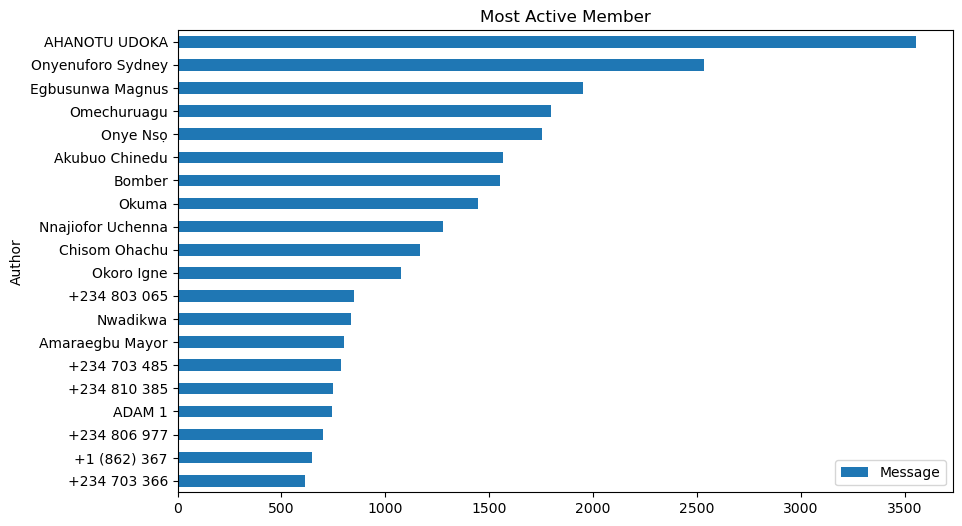

In [62]:
# Let's start some plotting.

# First, The most active group member

user_msg.tail(20).plot(kind = 'barh', figsize = (10, 6), title='Most Active Member');

### <font color = green>And that goes to the Group president, A Medical Practitioner based in UK👋👋👋👋 

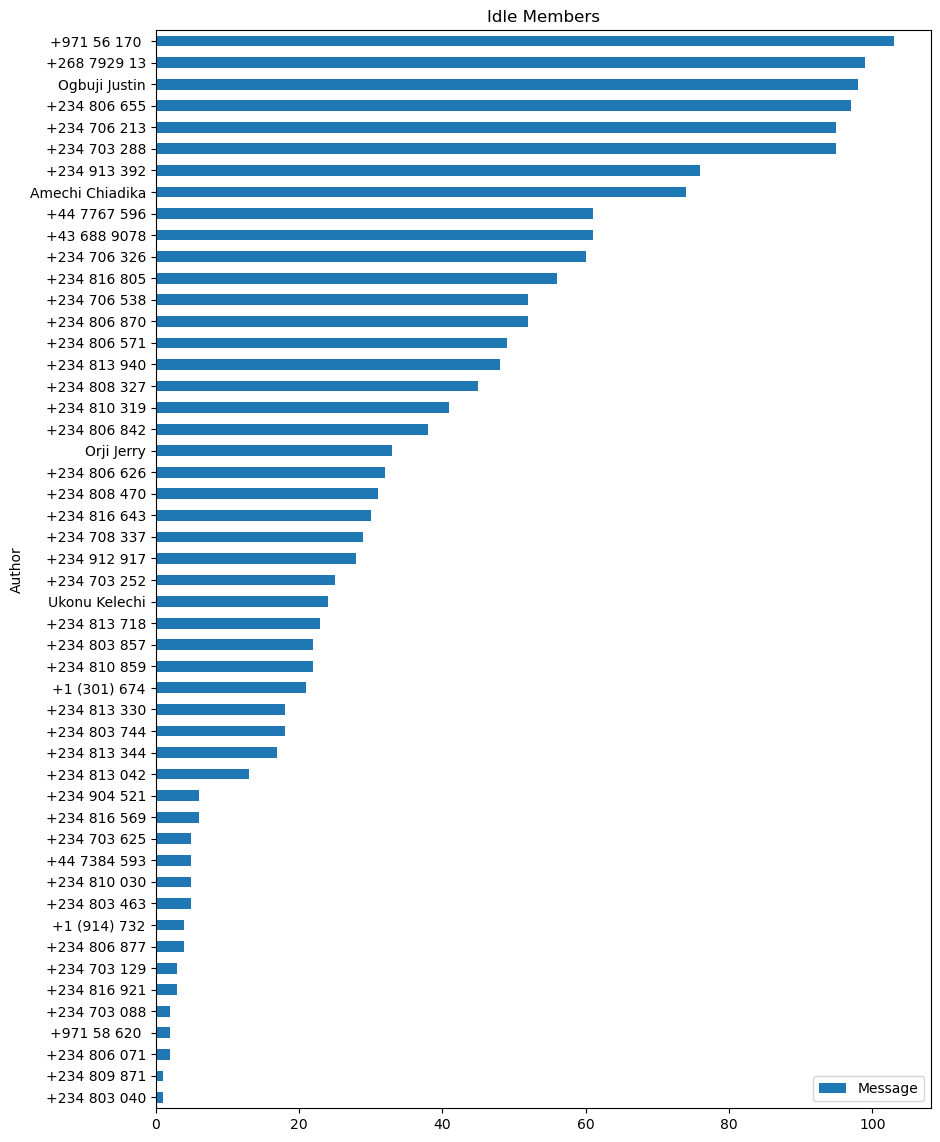

In [63]:
# Next is the most idle member in the group

user_msg.head(50).plot(kind = 'barh', figsize = (10, 14), title='Idle Members');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Author', ylabel='count'>

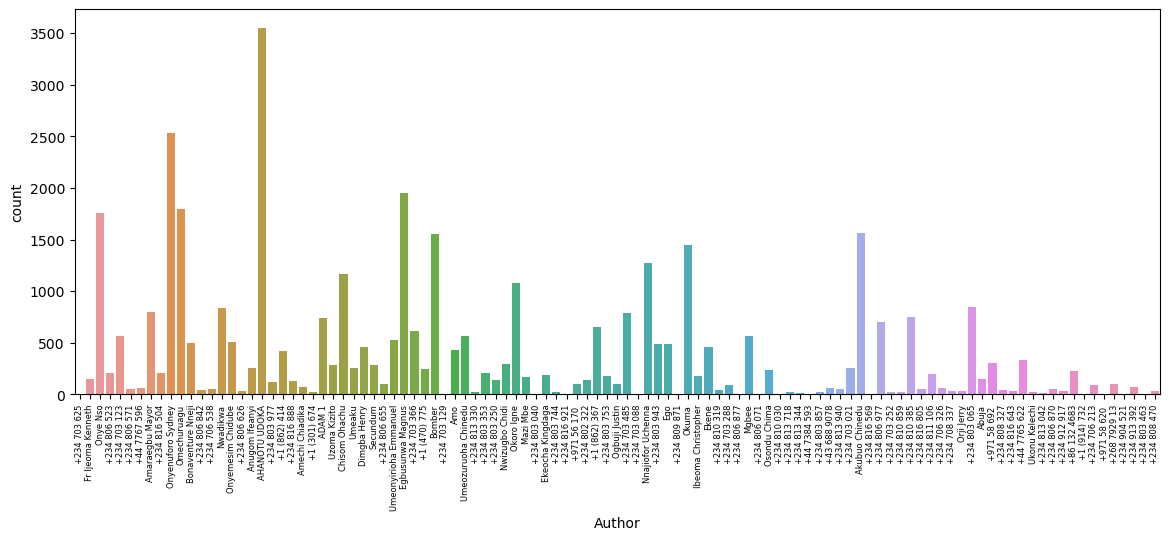

In [64]:
# Still showing the number of messages and media by each member of the group

plt.figure(figsize=(14, 5))
plt.xticks(rotation = 90, fontsize = 6)
sns.countplot(df.Author)

In [67]:
# Media Statistics

# Let's check those that posts media the most in this group😒😒

med_stat = df.groupby('Author')[['Media']].sum().sort_values(by = 'Media', ascending = True)
med_stat

,Media
Author,
+234 806 071,0
+234 809 871,0
+234 810 859,0
+1 (914) 732,0
+234 904 521,0
...,...
Okuma,473
Bomber,488
Omechuruagu,623


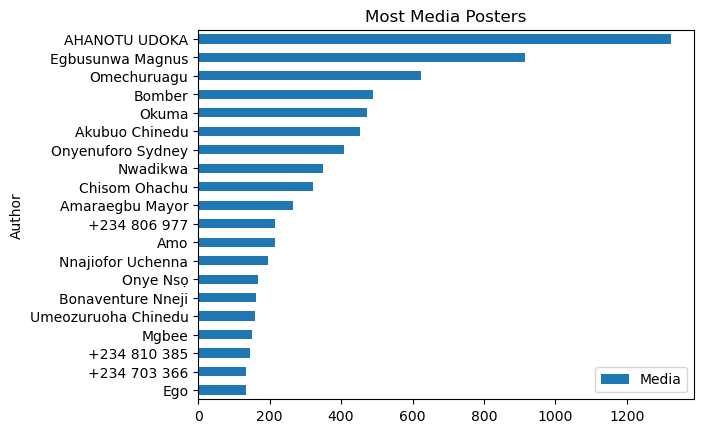

In [68]:
med_stat.tail(20).plot(kind = 'barh', legend = True, title='Most Media Posters');

### The group president is still leading👍👍👍

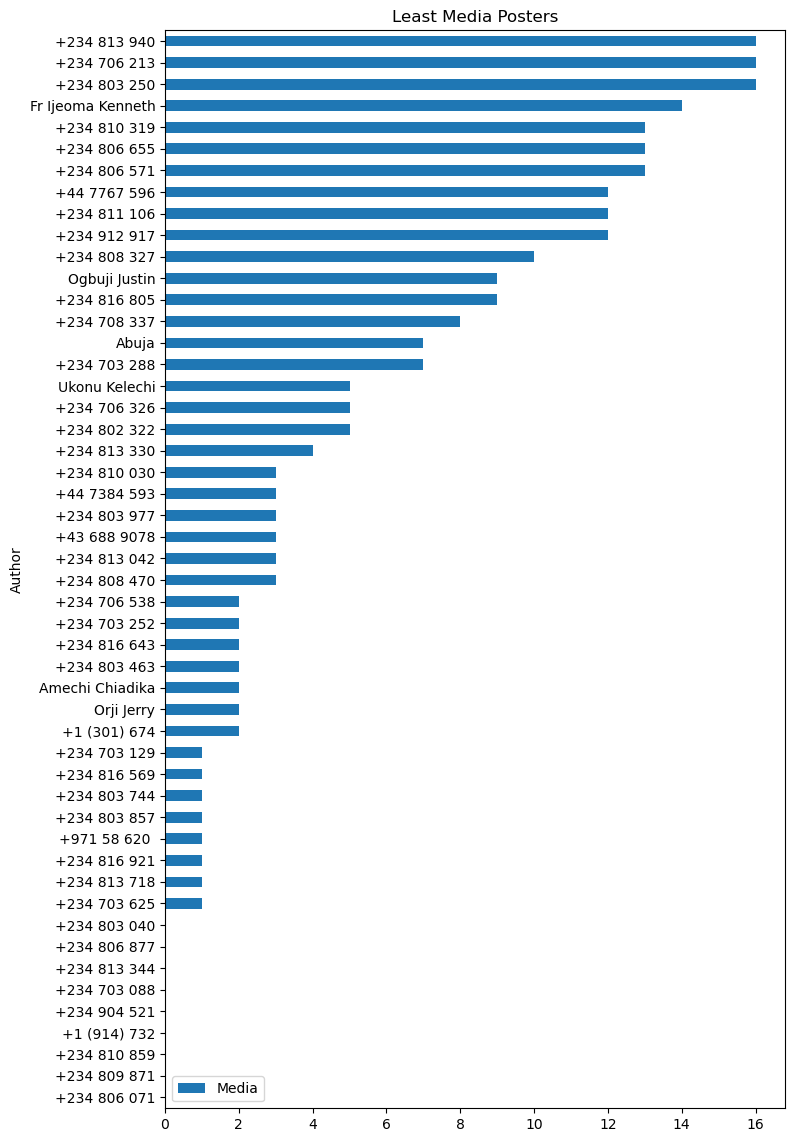

In [69]:
med_stat.head(50).plot(kind = 'barh', figsize = (8, 14), legend = True, title='Least Media Posters');

# Let's do some Timely analysis

In [70]:
df.Year.nunique()

4

In [71]:
year = df.groupby('Year')
year

In [75]:
# messages = df[df.Message != '<Media omitted>']
# messages

In [76]:
# Monthly messages

monthly = df.groupby('Mon/Year')['Message'].count().sort_values(ascending = True)
monthly

Mon/Year
Oct-2019     148
Apr-2020     182
Nov-2019     211
Jun-2020     369
Nov-2022     502
Oct-2020     513
Feb-2022     537
Dec-2019     541
Jan-2021     559
Mar-2020     578
Sep-2020     644
Mar-2022     699
Apr-2022     733
Jun-2021     739
May-2020     757
Aug-2022     787
Jan-2022     792
Jan-2020     844
Dec-2022     848
Jul-2020    1076
Oct-2022    1085
May-2021    1151
Sep-2021    1253
Apr-2021    1306
Nov-2021    1417
Feb-2021    1437
Dec-2021    1478
Mar-2021    1580
Jul-2022    1610
Aug-2020    1650
Aug-2021    1654
Jun-2022    1722
Feb-2020    1787
Oct-2021    1800
May-2022    1812
Jul-2021    1935
Sep-2022    2701
Name: Message, dtype: int64

In [81]:
# permit me to play with data small

# Let me get by percentage, the Monthly messages

for k, v in monthly.items():
    avg = round((v/sum(monthly)) * 100, 2)
    
    print(f'{k} - {avg}%')

Oct-2019 - 0.38%
Apr-2020 - 0.46%
Nov-2019 - 0.54%
Jun-2020 - 0.94%
Nov-2022 - 1.27%
Oct-2020 - 1.3%
Feb-2022 - 1.36%
Dec-2019 - 1.37%
Jan-2021 - 1.42%
Mar-2020 - 1.47%
Sep-2020 - 1.63%
Mar-2022 - 1.77%
Apr-2022 - 1.86%
Jun-2021 - 1.87%
May-2020 - 1.92%
Aug-2022 - 2.0%
Jan-2022 - 2.01%
Jan-2020 - 2.14%
Dec-2022 - 2.15%
Jul-2020 - 2.73%
Oct-2022 - 2.75%
May-2021 - 2.92%
Sep-2021 - 3.18%
Apr-2021 - 3.31%
Nov-2021 - 3.59%
Feb-2021 - 3.64%
Dec-2021 - 3.75%
Mar-2021 - 4.01%
Jul-2022 - 4.08%
Aug-2020 - 4.18%
Aug-2021 - 4.19%
Jun-2022 - 4.37%
Feb-2020 - 4.53%
Oct-2021 - 4.56%
May-2022 - 4.59%
Jul-2021 - 4.91%
Sep-2022 - 6.85%


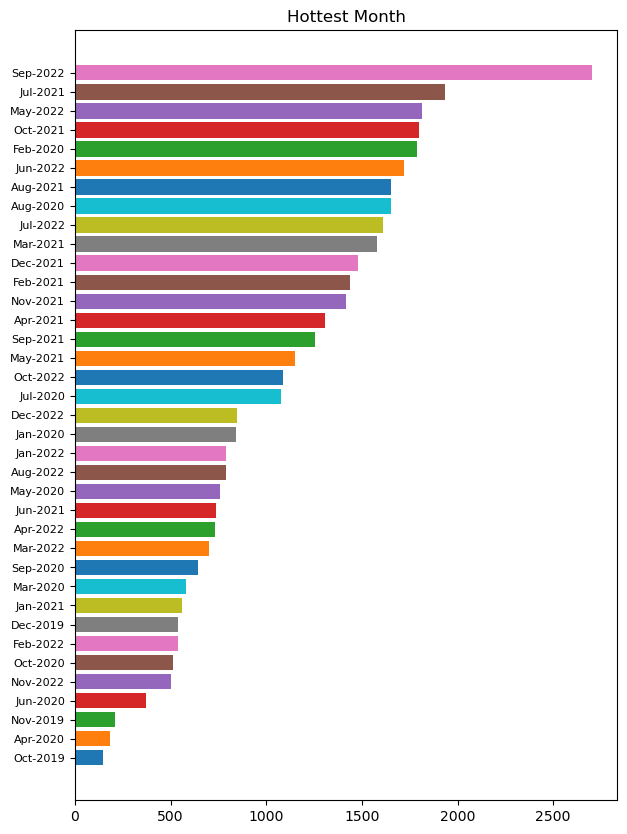

In [82]:
plt.figure(figsize=(7, 10))
plt.yticks(fontsize = 8)
plt.title('Hottest Month')
for k, v in monthly.items():
    plt.barh(k, v)

In [83]:
# Hottest Days in  the group

days = df.groupby('Day')[['Message']].count().sort_values(by = 'Message', ascending = False)
days

,Message
Day,
Friday,6481
Sunday,6362
Thursday,6189
Monday,5723
Saturday,5330
Wednesday,4847
Tuesday,4505


Text(0.5, 1.0, 'Hottest Days')

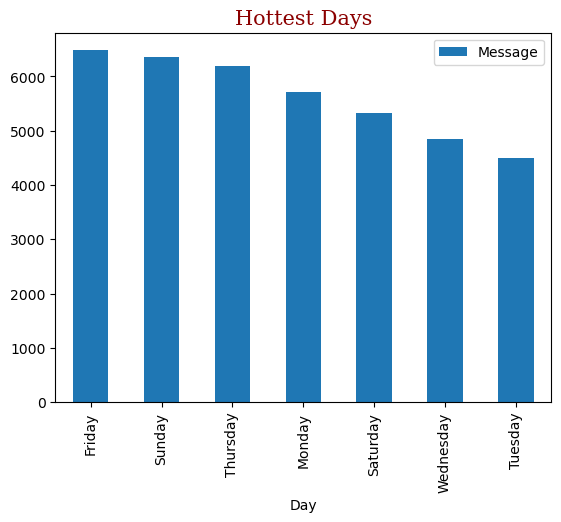

In [85]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

days.plot(kind = 'bar')
plt.title('Hottest Days', fontdict= font2)

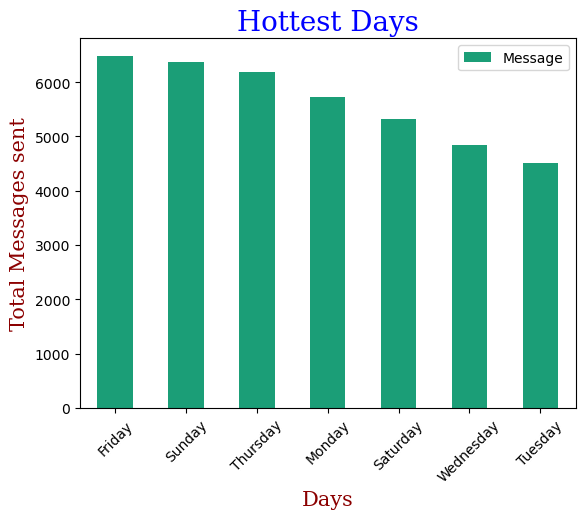

In [86]:
days.plot(kind = 'bar',colormap = 'Dark2')
plt.xticks(rotation = 45, color = 'black')
plt.xlabel('Days', fontdict=font2)
plt.ylabel('Total Messages sent', fontdict=font2)
plt.title('Hottest Days', fontdict= font1, color = 'blue');

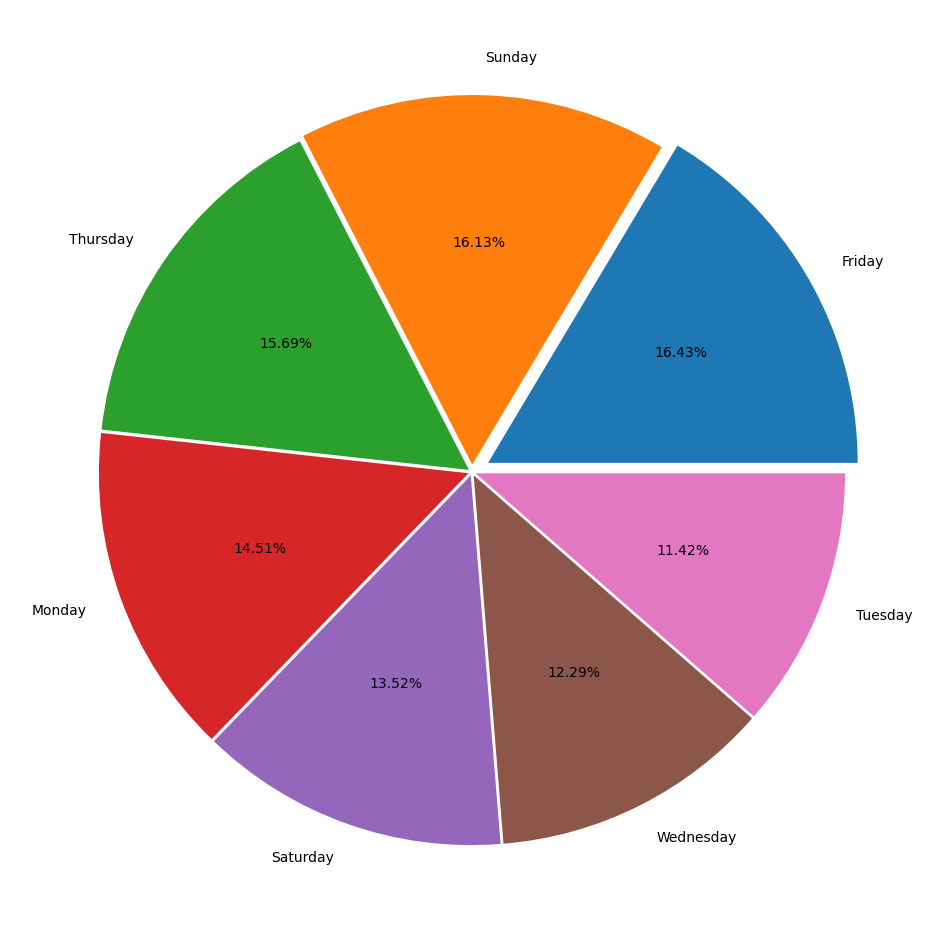

In [87]:
plt.figure(figsize = (12, 12))
exp = [.05, .02, .01, .01, .01, .01, .01]
plt.pie(days.Message, autopct='%2.2f%%', labels = days.index, explode = exp);

In [88]:
# Most Active time in the group

time = df.groupby('Time')[['Message']].count().sort_values(by='Message', ascending = False)
time

,Message
Time,
10:00 PM,111
10:01 PM,104
10:36 PM,89
10:27 PM,86
10:21 PM,86
...,...
3:12 AM,1
12:28 AM,1
2:40 AM,1


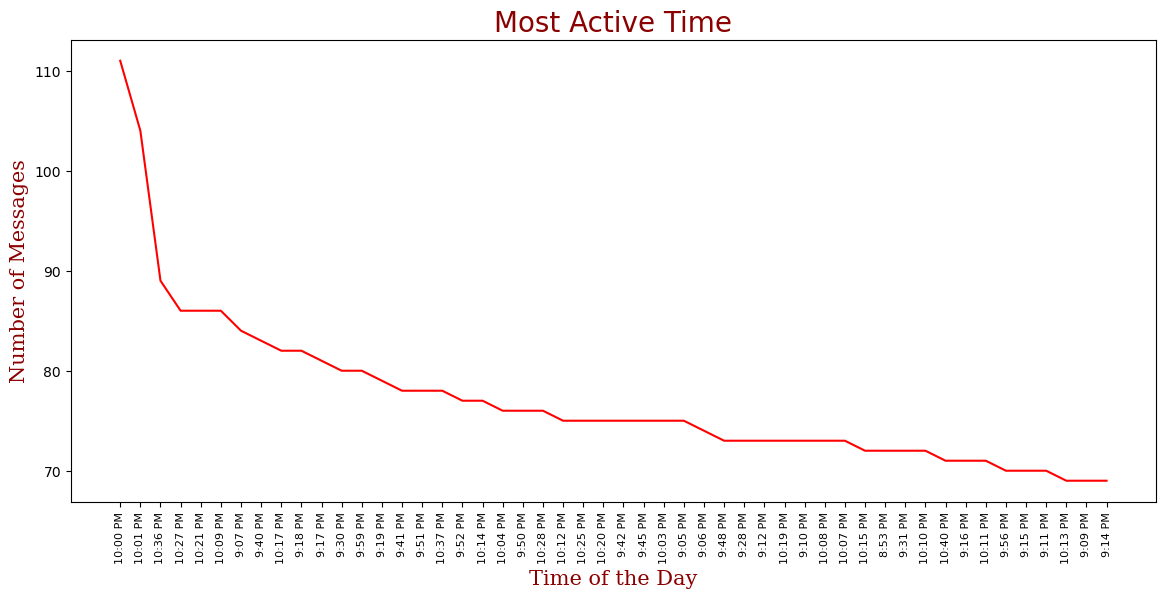

In [89]:
plt.figure(figsize = (14, 6))
plt.xticks( rotation = 90, fontsize = 8)
plt.xlabel('Time of the Day', fontdict=font2)
plt.ylabel('Number of Messages', fontdict = font2)
plt.title('Most Active Time', fontsize = 20, color = 'darkred')
plt.plot(time.head(50), color = 'red');

### <font color = green> No doubts, this 10pm you see that skyrocketed like this is the group time for giveaways on almost every birthday celebrations

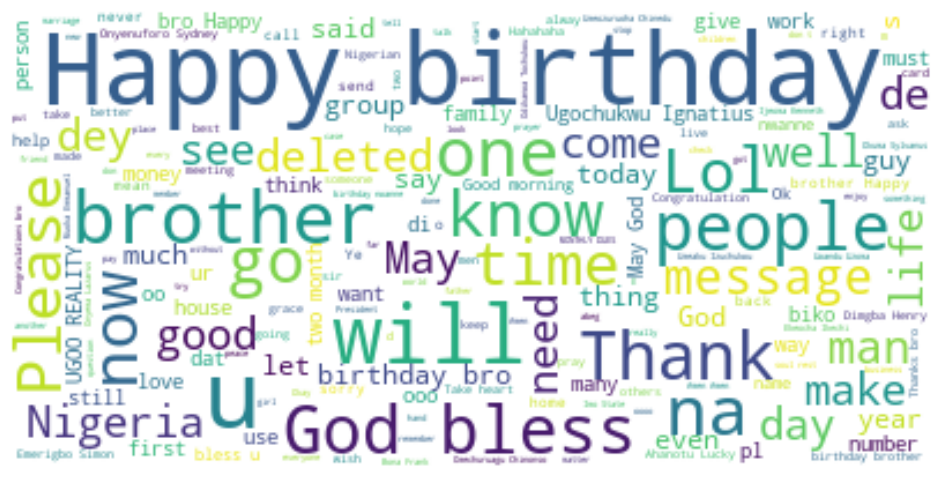

In [90]:
# The highest used words in the group

messages = df[df.Message != '<Media omitted>']
text = ' '.join(i for i in messages.Message)
wcloud = wc.WordCloud(stopwords = wc.STOPWORDS, background_color= 'white').generate(text)
plt.figure(figsize = (14, 6))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### <font color = red>We sabi wish 'Happy Birthday eeh!' and this we no dey play with God 'God Bless You'. Its a group of Seminarians and Priests so you wouldn't expect less

In [345]:
# df.to_csv('08 set.csv', index = False)

# Thanks 

#### Any contribution, suggestions and criticisms are highly welcomed and appreciated. I'm waiting for most of it. 

### Chisom Ohachu ✍️✍️✍️